In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
network = load_model('/content/drive/MyDrive/Models/network')

In [ ]:
img = cv2.imread('/content/IMG_1136.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(blur)

In [ ]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive)

In [ ]:
invertion = 255 - adaptive
cv2_imshow(invertion)

In [ ]:
dilation = cv2.dilate(invertion, np.ones((2,2)))
cv2_imshow(dilation)

In [ ]:
edges = cv2.Canny(dilation, 40, 150)
cv2_imshow(edges)

In [4]:
dilation = cv2.dilate(edges, np.ones((3,3)))
#cv2_imshow(dilation)

In [ ]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method="left-to-right")[0]
  return conts

In [ ]:
conts = find_contours(dilation.copy())

In [ ]:
conts

(array([[[ 94,  87]],
 
        [[ 93,  88]],
 
        [[ 92,  88]],
 
        [[ 91,  89]],
 
        [[ 86,  89]],
 
        [[ 82,  93]],
 
        [[ 81,  93]],
 
        [[ 81,  94]],
 
        [[ 76,  99]],
 
        [[ 76, 100]],
 
        [[ 73, 103]],
 
        [[ 73, 104]],
 
        [[ 72, 105]],
 
        [[ 72, 106]],
 
        [[ 71, 107]],
 
        [[ 71, 108]],
 
        [[ 70, 109]],
 
        [[ 70, 110]],
 
        [[ 69, 111]],
 
        [[ 69, 113]],
 
        [[ 68, 114]],
 
        [[ 68, 115]],
 
        [[ 67, 116]],
 
        [[ 67, 118]],
 
        [[ 66, 119]],
 
        [[ 66, 120]],
 
        [[ 65, 121]],
 
        [[ 65, 123]],
 
        [[ 64, 124]],
 
        [[ 64, 125]],
 
        [[ 63, 126]],
 
        [[ 63, 129]],
 
        [[ 62, 130]],
 
        [[ 62, 132]],
 
        [[ 61, 133]],
 
        [[ 61, 135]],
 
        [[ 60, 136]],
 
        [[ 60, 140]],
 
        [[ 59, 141]],
 
        [[ 59, 147]],
 
        [[ 58, 148]],
 
        [[ 58, 1

58 87 87 91


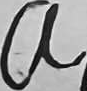

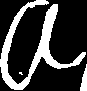

72 139 8 4
75 158 7 6
126 530 6 15


131 544 4 3
134 526 20 18


138 60 25 122


147 544 3 2
150 546 3 2
175 100 64 63


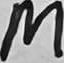

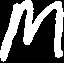

256 95 40 57


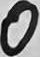

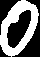

298 93 38 68


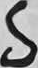

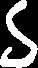

349 77 38 89


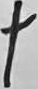

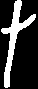

488 92 51 80


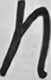

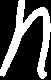

557 101 37 58


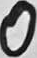

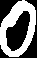

604 68 45 104


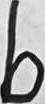

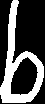

658 106 29 49


699 66 71 119


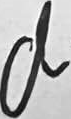

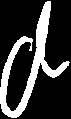

769 112 2 2
773 87 58 124


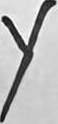

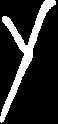

971 33 183 169
1067 123 2 2
1076 96 3 2
1149 110 3 3
1159 89 107 88


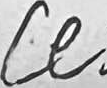

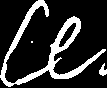

1189 128 5 6
1200 147 3 2
1248 141 2 2
1258 100 29 66


1409 126 37 44


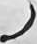

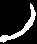

1418 71 37 54


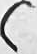

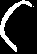

1456 143 4 4
1464 118 40 59


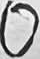

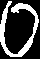

1473 113 2 2
1475 140 3 2
1488 135 6 5
1522 75 21 105


1532 171 30 9
1536 136 11 12


1538 127 3 2
1542 108 2 2
1547 132 24 41


1567 132 4 5
1575 113 61 72


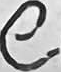

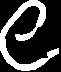

1639 107 46 71


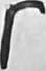

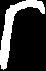

1733 490 5 4
1822 89 84 89


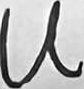

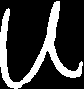

1915 100 57 78


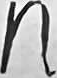

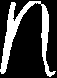

1997 82 14 117


2030 95 57 88


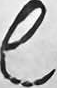

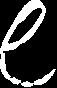

2069 403 10 9
2077 413 280 118
2095 92 43 93


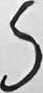

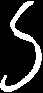

2162 101 42 89


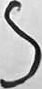

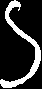

2206 484 5 2
2311 105 54 9
2326 115 20 86


2352 517 100 30


2362 82 47 122


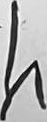

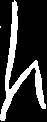

2384 110 3 3
2384 102 5 5
2420 127 50 55


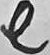

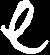

2453 533 9 15


2478 110 51 117


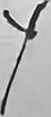

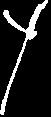

2627 444 4 5
2633 82 43 141
2695 137 70 59


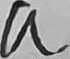

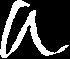

2715 281 63 92


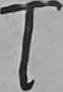

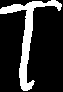

2741 456 15 65


2762 424 11 20


2765 519 9 8
2772 130 11 111


2776 449 42 58


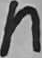

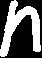

2778 518 9 8
2782 188 7 5
2783 123 25 55


2788 291 50 60


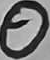

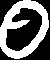

2791 518 8 8
2827 124 12 130


2831 427 52 84


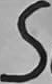

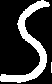

2840 116 36 66


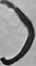

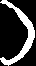

2882 453 64 66


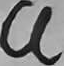

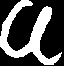

2888 143 66 78


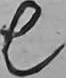

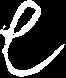

2903 281 47 84


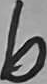

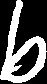

2945 175 4 3
2952 459 50 57


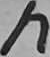

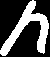

2962 292 61 78


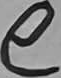

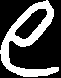

2967 145 66 83


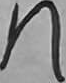

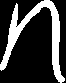

3006 458 50 70


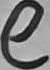

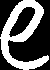

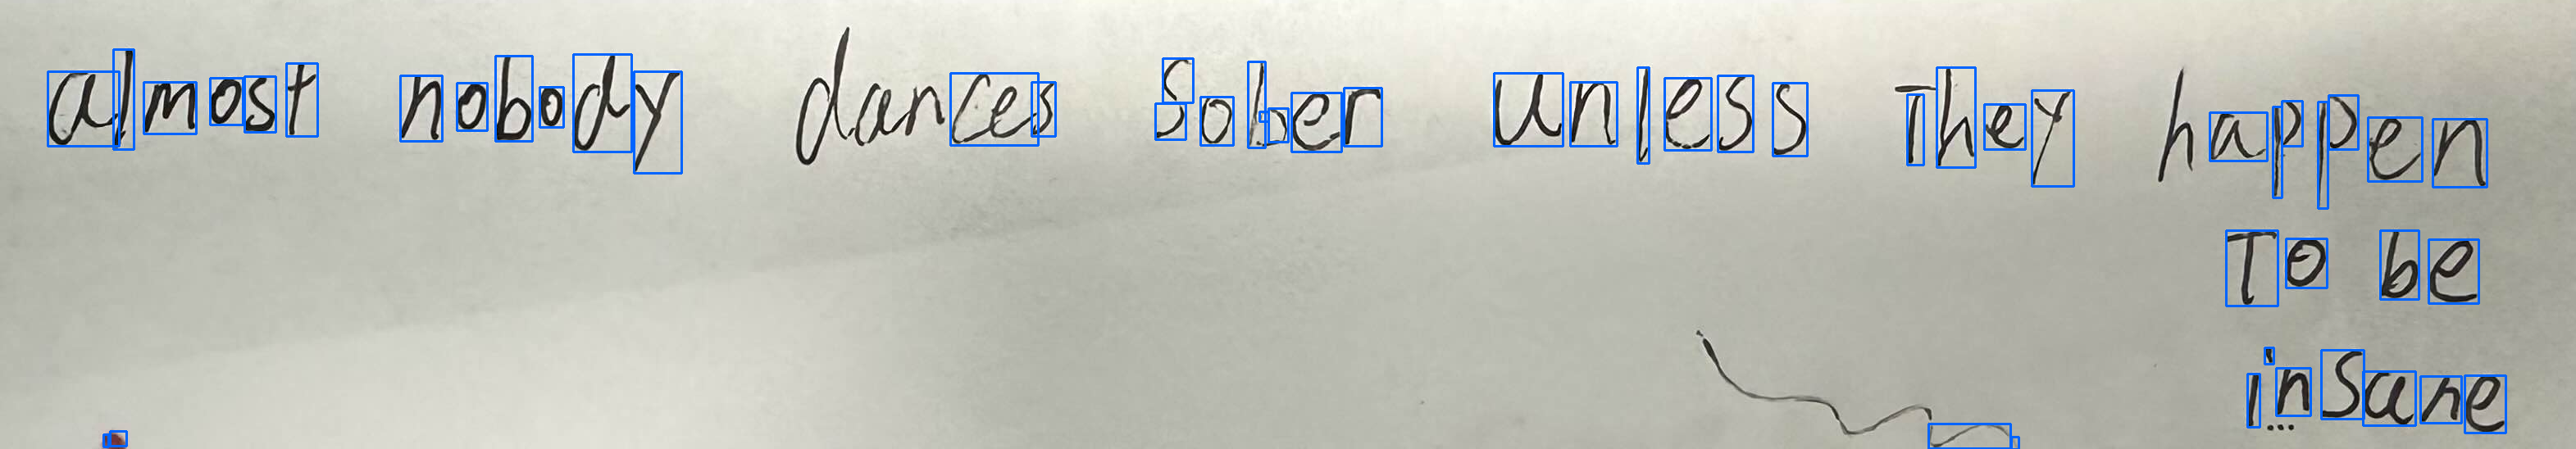

In [ ]:
min_w, max_w = 4, 160
min_h, max_h = 10,140
img_copy = img.copy()
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  print(x, y, w, h)
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    roi = gray[y: y+h, x: x+w]
    cv2_imshow(roi)
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, margin = 2):
  roi = img[y - margin: y + h, x - margin: x+w + margin]
  return roi

In [ ]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

In [ ]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width = 28)
  else:
    resized = imutils.resize(img, height = 28)
  (h,w) = resized.shape
  dX = int(max(0,28 - w) / 2.0)
  dY = int(max(0,28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top = dY, bottom = dY,right = dX, left = dX, borderType = cv2.BORDER_CONSTANT, value = (0,0,0))
  filled = cv2. resize(filled, (28,28))
  return filled

In [ ]:
conts[6]

array([[[154,  60]],

       [[153,  61]],

       [[153,  66]],

       [[154,  67]],

       [[154,  76]],

       [[153,  77]],

       [[153,  85]],

       [[152,  86]],

       [[152, 107]],

       [[151, 108]],

       [[151, 115]],

       [[150, 116]],

       [[150, 126]],

       [[149, 127]],

       [[149, 133]],

       [[148, 134]],

       [[148, 141]],

       [[147, 142]],

       [[147, 145]],

       [[146, 146]],

       [[146, 148]],

       [[145, 149]],

       [[145, 150]],

       [[144, 151]],

       [[144, 155]],

       [[143, 156]],

       [[143, 158]],

       [[142, 159]],

       [[142, 161]],

       [[141, 162]],

       [[141, 165]],

       [[140, 166]],

       [[140, 171]],

       [[139, 172]],

       [[139, 174]],

       [[138, 175]],

       [[138, 178]],

       [[139, 179]],

       [[139, 180]],

       [[140, 181]],

       [[143, 181]],

       [[144, 180]],

       [[145, 180]],

       [[146, 179]],

       [[146, 178]],

       [[1

In [ ]:
(x, y, w, h) = cv2.boundingRect(conts[3])
print(x, y, w, h)
test_img = thresholding(gray[y: y+h, x: x+w])
cv2_imshow(test_img)
(h, w) = test_img.shape
print(w, h)
test_img2 = resize_img(test_img, w, h)
cv2_imshow(test_img2)

126 530 6 15


6 15


In [ ]:
cv2_imshow(cv2.resize(test_img, (28,28)))

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis = -1)
  return img

In [ ]:
test_img2.shape, normalization(test_img2).shape

((28, 28), (28, 28, 1))

In [ ]:
characters = []

In [ ]:
def process_box(gray, x, y, w, h):
  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)
  cv2_imshow(resized)
  normalized = normalization(resized)
  characters.append((normalized, (x, y, w, h)))



In [ ]:
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if( w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

In [ ]:
characters[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.19607843],
         [0.36078432],
         [0.39607844],
         [0.2784314 ],
         [0.08627451],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19607843],
         [0.56078434],
         [0.8039216 ],
         [0.94509804],
         [1.        ],
         [0.99215686],
         [0.9137255 ],
        

In [ ]:
boxes = [box[1] for box in characters]


In [ ]:
boxes

[(58, 87, 91, 93),
 (126, 530, 10, 17),
 (134, 526, 24, 20),
 (138, 60, 29, 124),
 (175, 100, 68, 65),
 (256, 95, 44, 59),
 (298, 93, 42, 70),
 (349, 77, 42, 91),
 (488, 92, 55, 82),
 (557, 101, 41, 60),
 (604, 68, 49, 106),
 (658, 106, 33, 51),
 (699, 66, 75, 121),
 (773, 87, 62, 126),
 (1159, 89, 111, 90),
 (1258, 100, 33, 68),
 (1409, 126, 41, 46),
 (1418, 71, 41, 56),
 (1464, 118, 44, 61),
 (1522, 75, 25, 107),
 (1536, 136, 15, 14),
 (1547, 132, 28, 43),
 (1575, 113, 65, 74),
 (1639, 107, 50, 73),
 (1822, 89, 88, 91),
 (1915, 100, 61, 80),
 (1997, 82, 18, 119),
 (2030, 95, 61, 90),
 (2095, 92, 47, 95),
 (2162, 101, 46, 91),
 (2326, 115, 24, 88),
 (2352, 517, 104, 32),
 (2362, 82, 51, 124),
 (2420, 127, 54, 57),
 (2453, 533, 13, 17),
 (2478, 110, 55, 119),
 (2695, 137, 74, 61),
 (2715, 281, 67, 94),
 (2741, 456, 19, 67),
 (2762, 424, 15, 22),
 (2772, 130, 15, 113),
 (2776, 449, 46, 60),
 (2783, 123, 29, 57),
 (2788, 291, 54, 62),
 (2827, 124, 16, 132),
 (2831, 427, 56, 86),
 (2840, 

In [ ]:
pixels = np.array([pixel[0] for pixel in characters], dtype = 'float32')
pixels

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.69803923],
         ...,
         [0.27058825],
         [1.        ],
         [1.        ]],

        [[0.        ],
         [0.        ],
         [0.06666667],
         ...,
         [0.4862745 ],
         [1.        ],
         [1.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.7019608 ],
         [0.99607843],
         [0.9098039 ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
digits = 'OI234S6789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list = digits + letters
characters_list = [l for l in characters_list]

In [ ]:
predictions = network.predict(pixels)
predictions

2/2 [==============================] - 0s 13ms/step


array([[3.8372259e-06, 9.6846124e-18, 1.4133883e-09, ..., 1.0505749e-10,
        1.9896428e-08, 1.2844708e-11],
       [1.5133162e-06, 2.8028987e-07, 4.6903290e-09, ..., 5.2203116e-04,
        1.1938714e-01, 1.3572384e-08],
       [3.4733751e-09, 1.7894277e-09, 3.2581889e-07, ..., 7.6308590e-03,
        4.8559681e-03, 6.4716505e-06],
       ...,
       [5.8000828e-03, 2.8544380e-14, 7.8808432e-07, ..., 4.1979212e-16,
        1.3832172e-11, 3.1263625e-08],
       [1.7774482e-14, 4.2582329e-08, 3.0605879e-14, ..., 1.9993515e-05,
        9.7572154e-01, 6.2413083e-12],
       [3.2625403e-04, 6.8688263e-11, 1.3309126e-05, ..., 5.0031780e-12,
        4.0499902e-08, 2.6931171e-04]], dtype=float32)

In [ ]:
predictions.shape

(54, 36)

In [ ]:
boxes

[(58, 87, 91, 93),
 (126, 530, 10, 17),
 (134, 526, 24, 20),
 (138, 60, 29, 124),
 (175, 100, 68, 65),
 (256, 95, 44, 59),
 (298, 93, 42, 70),
 (349, 77, 42, 91),
 (488, 92, 55, 82),
 (557, 101, 41, 60),
 (604, 68, 49, 106),
 (658, 106, 33, 51),
 (699, 66, 75, 121),
 (773, 87, 62, 126),
 (1159, 89, 111, 90),
 (1258, 100, 33, 68),
 (1409, 126, 41, 46),
 (1418, 71, 41, 56),
 (1464, 118, 44, 61),
 (1522, 75, 25, 107),
 (1536, 136, 15, 14),
 (1547, 132, 28, 43),
 (1575, 113, 65, 74),
 (1639, 107, 50, 73),
 (1822, 89, 88, 91),
 (1915, 100, 61, 80),
 (1997, 82, 18, 119),
 (2030, 95, 61, 90),
 (2095, 92, 47, 95),
 (2162, 101, 46, 91),
 (2326, 115, 24, 88),
 (2352, 517, 104, 32),
 (2362, 82, 51, 124),
 (2420, 127, 54, 57),
 (2453, 533, 13, 17),
 (2478, 110, 55, 119),
 (2695, 137, 74, 61),
 (2715, 281, 67, 94),
 (2741, 456, 19, 67),
 (2762, 424, 15, 22),
 (2772, 130, 15, 113),
 (2776, 449, 46, 60),
 (2783, 123, 29, 57),
 (2788, 291, 54, 62),
 (2827, 124, 16, 132),
 (2831, 427, 56, 86),
 (2840, 

In [ ]:
img_copy = img.copy()
for(prediction, (x, y, w, h)) in zip(predictions, boxes):
  i = np.argmax(prediction)
  probability = prediction[i]
  print(probability)
  character = characters_list[i]
  print(character)

  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_copy, character, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
  print(character, '=>', probability * 100)
  cv2_imshow(img_copy)